## Dimensionality reduction and PCA
PCA is unsupervised learning (contains no label information). It is usually used to explore data and understand patterns and used to set up **clustering** analysis.

Objective of clustering is to find patterns and relationships within a dataset, such as:
- Geometric (feature distances)
- Connectivity (spectral clustering, graphs)

However, the original dimensionally {R^n}  can be large! The goal is to reduce it, k≪n!

**Dimensionality reduction** is the process of reducing the number of random variables under consideration
- Combine, transform or select variables
- Can use linear or nonlinear operations

**PCA**, or prinicpal component analysis, is one common way to perform dimensionality reduction. Dimensionality reduction has many uses in data science:
- Visualizing, exploring and understanding the data
- Extracting ”features” and dominant modes
- Cleaning data
- Speeding up subsequent learning task
- Building simpler model later

It has many practical applications as well, such as image/audio compression, face recognition, and natural language processing (latent semantic analysis) to name a few!


## PCA, by hand
**Step 1: Normalize**

Normalize (sometimes called scaling and/or standardizing) your data, especially if the different dimensions contain different scales of data.

**Step 2: Estimate the mean and covariance matrix from the data**

The covariance matrix, C, captures the variability of the data points along different directions, it also captures correlations, covariance between different coordinates (features in the x vector).

**Step 3: Take the largest K eigenvectors of C which correspond to the largest eigenvalues**

Use a solver for this part, such as {eigs} function from scipy.sparse.linalg. In this case, I used K=2 to reduce the data to 2 dimensions.

C=UΛU^T

C has d×d dimensions

U=eigenvectors

**Step 4: Compute the reduced representation of a data point**

Key Concept: PCA is a form of linear reduction scheme, because the prinicpal component $z_i$ is linear transformation of the x.


## Food consumption in European countries
This anaylsis uses PCA to compare European countries consumption of various food and drink. 

## Libraries

In [17]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.sparse.linalg as ll
import sklearn.preprocessing as skpp

## Load and Prep Data

In [18]:
# Import CSV and save it in different dataframes
food_consumption = pd.read_csv("data/food-consumption.csv")
display(food_consumption)

# pull out country list
countries = food_consumption['Country']
#display(countries)

# remove country column, convert to array
Anew = food_consumption.drop(columns=['Country']).to_numpy()
#display(Anew)

# get shape of matrix
m, n = Anew.shape

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19,57,51,19,21,27,...,81,75,44,71,22,91,85,74,30,26
1,Italy,82,10,60,2,55,41,3,2,4,...,67,71,9,46,80,66,24,94,5,18
2,France,88,42,63,4,76,53,11,23,11,...,87,84,40,45,88,94,47,36,57,3
3,Holland,96,62,98,32,62,67,43,7,14,...,83,89,61,81,15,31,97,13,53,15
4,Belgium,94,38,48,11,74,37,23,9,13,...,76,76,42,57,29,84,80,83,20,5
5,Luxembourg,97,61,86,28,79,73,12,7,26,...,85,94,83,20,91,94,94,84,31,24
6,England,27,86,99,22,91,55,76,17,20,...,76,68,89,91,11,95,94,57,11,28
7,Portugal,72,26,77,2,22,34,1,5,20,...,22,51,8,16,89,65,78,92,6,9
8,Austria,55,31,61,15,29,33,1,5,15,...,49,42,14,41,51,51,72,28,13,11
9,Switzerland,73,72,85,25,31,69,10,17,19,...,79,70,46,61,64,82,48,61,48,30


## Normalize data
In this case, we normalize the data because features have very different ranges

In [19]:
stdA = np.std(Anew,axis = 0)
Anew = Anew @ np.diag(np.ones(stdA.shape[0])/stdA)
Anew = Anew.T

#display(pd.DataFrame(Anew))

## PCA

Here, we extract the first two dimensions following the steps listed above.

In [20]:
mu = np.mean(Anew,axis = 1)
xc = Anew - mu[:,None]

C = np.dot(xc,xc.T)/m

K=2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue

## Plot 1
The location of the countries does seem logical (countries close to one another are likely to consume similar foods) – Nordic countries are grouped together, as are countries in the S-SW (Portugal, Spain, Italy) with a likely strong Mediterranean influence. Additionally, countries in central Europe are grouped (Germany, Belgium, Switzerland).

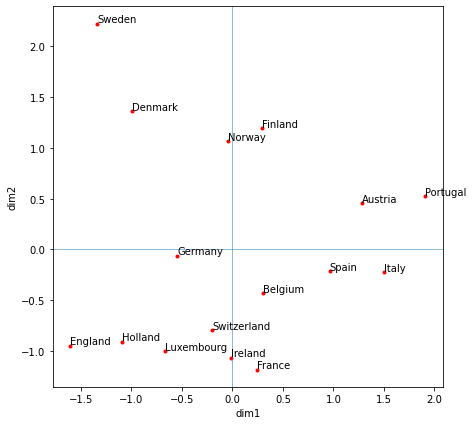

In [21]:
plt.figure(figsize=(7, 7))
plt.xlabel("dim1")
plt.ylabel("dim2")
plt.plot(dim1, dim2, 'r.')
plt.axvline(0, linewidth=0.5)
plt.axhline(0, linewidth=0.5)

# add labels
for i in range(0, countries.shape[0]):
    plt.text(dim1[i], dim2[i] + 0.01, countries[i])
plt.show()


## Check correlations to dim1 and dim2
Dimension 1 (PC 1) is highly correlated to countries with high consumption of tea, sweetener, tin soup, frozen veggies, and tinned fruit. Dimension 2 is highly correlated with high consumption of instant coffee, powder soup, and low consumption of frozen fish and crisp bread).

In [6]:
# add dim1 and dim2
food_consumption['dim1'] = dim1.tolist()
food_consumption['dim2'] = dim2.tolist()
display(food_consumption.drop(columns=['Country']).corr(method='pearson').tail(2).style.format('{0:,.2f}'))

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread,dim1,dim2
dim1,0.08,0.43,0.70,0.78,0.58,0.43,0.77,0.51,0.51,0.75,0.61,0.51,0.88,0.68,-0.61,0.29,0.30,-0.38,0.21,0.43,1.00,0.00
dim2,-0.39,0.78,-0.09,-0.23,0.30,0.68,0.13,-0.36,-0.72,-0.54,0.48,0.26,0.35,0.13,0.36,0.13,-0.08,0.21,0.55,-0.76,0.00,1.00


## Flipping the Analysis
In the analysis above, we looked at which countries were similar to one another based on their food consumptions. In the next set of analysis, we will look at how foods are related to another based on the countries were they are eaten. 

If part 1 was comparing culinary culures by country, this next analysis can be thought of as comparing how common (or uncommon) food pairings are. 

First, let's treat this as a completely new problem and reset our notebook.

In [24]:
%reset -f

## Libraries

In [25]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.sparse.linalg as ll
import sklearn.preprocessing as skpp

## Load and Prep Data

In [26]:
# Import CSV and save it in different dataframes
food_consumption = pd.read_csv("data/food-consumption.csv")

# transpose df
food_consumption = food_consumption.set_index('Country').T.rename_axis(index='Food Item', columns=None).reset_index()
display(food_consumption)

# pull out country list
food_items = food_consumption['Food Item']
#display(food_items)

# remove food item column, convert to array
Anew = food_consumption.drop(columns=['Food Item']).to_numpy()
#display(Anew)

# get shape of matrix
m, n = Anew.shape

,Food Item,Germany,Italy,France,Holland,Belgium,Luxembourg,England,Portugal,Austria,Switzerland,Sweden,Denmark,Norway,Finland,Spain,Ireland
0,Real coffee,90,82,88,96,94,97,27,72,55,73,97,96,92,98,70,30
1,Instant coffee,49,10,42,62,38,61,86,26,31,72,13,17,17,12,40,52
2,Tea,88,60,63,98,48,86,99,77,61,85,93,92,83,84,40,99
3,Sweetener,19,2,4,32,11,28,22,2,15,25,31,35,13,20,18,11
4,Biscuits,57,55,76,62,74,79,91,22,29,31,61,66,62,64,62,80
5,Powder soup,51,41,53,67,37,73,55,34,33,69,43,32,51,27,43,75
6,Tin soup,19,3,11,43,23,12,76,1,1,10,43,17,4,10,2,18
7,Potatoes,21,2,23,7,9,7,17,5,5,17,39,11,17,8,14,2
8,Frozen fish,27,4,11,14,13,26,20,20,15,19,54,51,30,18,23,5
9,Frozen veggies,21,2,5,14,12,23,24,3,11,15,45,42,15,12,7,3


## Normalize data

In [27]:
# In this case, we normalize the data because features have very different ranges
stdA = np.std(Anew,axis = 0)
Anew = Anew @ np.diag(np.ones(stdA.shape[0])/stdA)
Anew = Anew.T

#display(pd.DataFrame(Anew))

## PCA

In [31]:
mu = np.mean(Anew,axis = 1)
xc = Anew - mu[:,None]

C = np.dot(xc,xc.T)/m

K=2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue

(20,)


## Plot 2: Common (and uncommon) pairings
The location of the foods does seem logical (similar foods or ‘compatible’ foods are grouped together). Fresh fruit such as apples and oranges are grouped. So are common toppings such as jam, margarine, butter, and what they are put on (biscuits). Garlic and olive oil are loosely grouped and separated. Visually inspecting the graph, it seems that PC1 can be described as fish vs. high caffine (coffee, tea) intake and PC2 can be described by how much garlic and olive oil are apart of the diet for a country.

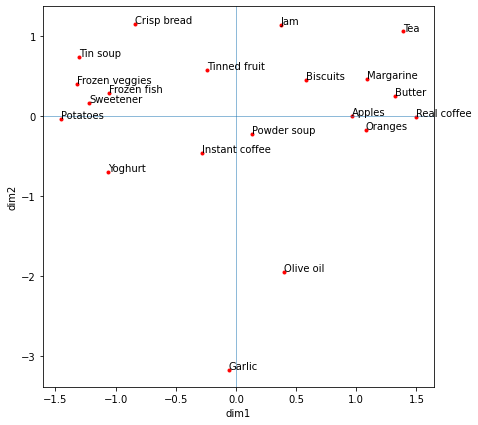

In [29]:
plt.figure(figsize=(7, 7))
plt.xlabel("dim1")
plt.ylabel("dim2")
plt.plot(dim1, dim2, 'r.')
plt.axvline(0, linewidth=0.5)
plt.axhline(0, linewidth=0.5)

# add labels
for i in range(0, food_items.shape[0]):
    plt.text(dim1[i], dim2[i] + 0.01, food_items[i])

plt.show()

## Check correlations to dim1 and dim2
Dimension 1 (PC 1) is highly correlated to food consumption areas like Germany, although it also has mild to strong correlations to many of the countries – indicating that this is indeed the dimension upon variation is maximized.
Dimension 2 is most highly correlated to Sweden (positive) and Spain (negative).

In [30]:
# add dim1 and dim2
food_consumption['dim1'] = dim1.tolist()
food_consumption['dim2'] = dim2.tolist()
display(food_consumption.drop(columns=['Food Item']).corr(method='pearson').tail(2).style.format('{0:,.2f}'))

,Germany,Italy,France,Holland,Belgium,Luxembourg,England,Portugal,Austria,Switzerland,Sweden,Denmark,Norway,Finland,Spain,Ireland,dim1,dim2
dim1,0.95,0.80,0.80,0.70,0.90,0.86,0.60,0.73,0.89,0.82,0.49,0.82,0.84,0.80,0.73,0.70,1.00,0.00
dim2,0.13,-0.42,-0.32,0.33,-0.07,-0.33,0.40,-0.49,-0.13,-0.24,0.56,0.43,0.38,0.35,-0.60,0.31,0.00,1.00
